<a href="https://colab.research.google.com/github/HyunVinh/AI/blob/main/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

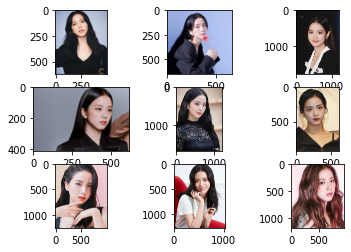

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/khuonmat/train/jisoo/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 97, 97, 64)      

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/khuonmat/train',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/khuonmat/test',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 40 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=40,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/40
4/4 [==============================] - 1s 364ms/step - loss: 0.2860 - accuracy: 0.8500
Epoch 2/40
4/4 [==============================] - 1s 320ms/step - loss: 0.2796 - accuracy: 0.8750
Epoch 3/40
4/4 [==============================] - 1s 303ms/step - loss: 0.2987 - accuracy: 0.8500
Epoch 4/40
4/4 [==============================] - 1s 327ms/step - loss: 0.1894 - accuracy: 0.9250
Epoch 5/40
4/4 [==============================] - 1s 309ms/step - loss: 0.4708 - accuracy: 0.8500
Epoch 6/40
4/4 [==============================] - 1s 323ms/step - loss: 0.1880 - accuracy: 0.9500
Epoch 7/40
4/4 [==============================] - 1s 300ms/step - loss: 0.2013 - accuracy: 0.8750
Epoch 8/40
4/4 [==============================] - 1s 324ms/step - loss: 0.4575 - accuracy: 0.8750
Epoch 9/40
4/4 [==============================] - 1s 322ms/step - loss: 0.1567 - accuracy: 0.9250
Epoch 10/40
4/4 [==============================] - 1s 327ms/step - loss: 0.1576 - accuracy: 0.9750
Epoch 11/40
4/4 [==

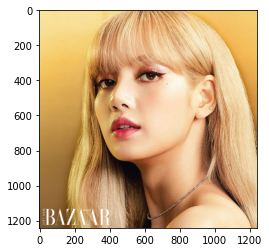

Lisa ne


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/khuonmat/test/lisa/11.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Jennie ne')
elif kq ==1:
  print('Jisoo ne')
elif kq ==2:
  print('Lisa ne')
elif kq ==3:
  print('Rose ne')


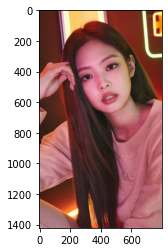

Jennie ne


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/khuonmat/test/jennie/12.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Jennie ne')
elif kq ==1:
  print('Jisoo ne')
elif kq ==2:
  print('Lisa ne')
elif kq ==3:
  print('Rose ne')

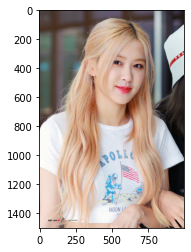

Rose ne


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/khuonmat/test/rose/11.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Jennie ne')
elif kq ==1:
  print('Jisoo ne')
elif kq ==2:
  print('Lisa ne')
elif kq ==3:
  print('Rose ne')